#### Context

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.

#### Content
Full tweet texts are provided with their labels for training data.
Mentioned users' username is replaced with @user.

In [4]:
#Importing of necessary libraries

import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import regexp_tokenize

In [5]:
#Loading the datasets

df = pd.read_csv('train.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
#Deleting duplicate records

df.drop_duplicates(inplace = True)
print('=== Information of the dataset == \n\n',df.info())
print('\n\n === Shape of the Dataset ==>',df.shape)
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 998.8+ KB
=== Information of the dataset == 

 None


 === Shape of the Dataset ==> (31962, 3)


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty


**This dataset consists of 31962 records and 3 columns**


**There are no null values in any of the variables**


**Label and Id have int datatype whereas the tweet variable has object datatype**


In [7]:
#Dropping off the id column as it is not needed for the model

df.drop(['id'], axis =1, inplace = True)

df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [8]:
# lets check the label column once and see the balance between two
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

**O here is for the tweets which are not racist or sexist and are more in the dataset as compared to 1 which are for racist and sexist tweets**

In [9]:
#We are now tokenizing sentences from tweets for futher processing

df['Tokenized sentences'] = df['tweet'].str.lower().apply(sent_tokenize).apply(','.join)

In [10]:
#Performing word tokenization from the tokenized sentences

df['Tokenized Words'] = df['Tokenized sentences'].apply(word_tokenize)
df.head(4)

,label,tweet,Tokenized sentences,Tokenized Words
0,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...,"[@, user, when, a, father, is, dysfunctional, ..."
1,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...,"[@, user, @, user, thanks, for, #, lyft, credi..."
2,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]"
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,"[#, model, i, love, u, take, with, u, all, the..."


In [11]:
#importing stopwords in addition to some other words

from nltk.corpus import stopwords 
new_stopwords_list = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin','br','n','t','e','end','see','go','s','to','ca','n','ure','he','z','!','@','#','$','%','^','&','*','(',')','ð','urð','±','â','~','~'])

**We will now import Lemmatizer and apply it on the tokenized words, to get only the meaningfull words for the model**

In [12]:
from nltk.stem import WordNetLemmatizer

lemma = WordNetLemmatizer()

def lem(text):
    return[lemma.lemmatize(w) for w in text if w not in new_stopwords_list]

In [13]:
df['Cleaned Text']= df['Tokenized Words'].apply(lem).apply(','.join)
df.head()

,label,tweet,Tokenized sentences,Tokenized Words,Cleaned Text
0,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...,"[@, user, when, a, father, is, dysfunctional, ...","user,father,dysfunctional,selfish,drag,kid,dys..."
1,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...,"[@, user, @, user, thanks, for, #, lyft, credi...","user,user,thanks,lyft,credit,n't,use,cause,n't..."
2,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","bihday,majesty"
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,"[#, model, i, love, u, take, with, u, all, the...","model,love,take,time,urð±,,,ðððð,..."
4,0,factsguide: society now #motivation,factsguide: society now #motivation,"[factsguide, :, society, now, #, motivation]","factsguide,:,society,motivation"


In [14]:
#For removing all numeric numbers


df['Final'] = df['Cleaned Text'].apply(lambda x: regexp_tokenize(x, "[^0-9]+")).apply(",".join)

df.head(4)

,label,tweet,Tokenized sentences,Tokenized Words,Cleaned Text,Final
0,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...,"[@, user, when, a, father, is, dysfunctional, ...","user,father,dysfunctional,selfish,drag,kid,dys...","user,father,dysfunctional,selfish,drag,kid,dys..."
1,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...,"[@, user, @, user, thanks, for, #, lyft, credi...","user,user,thanks,lyft,credit,n't,use,cause,n't...","user,user,thanks,lyft,credit,n't,use,cause,n't..."
2,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","bihday,majesty","bihday,majesty"
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,"[#, model, i, love, u, take, with, u, all, the...","model,love,take,time,urð±,,,ðððð,...","model,love,take,time,urð±,,,ðððð,..."


In [15]:
# Cleaning the final column again with special characters

df['Final'] = df['Final'].apply(lambda x: regexp_tokenize(str(x).lower(), "[^!@#$%&*(),.?<>;:''""\/{}=-_ ]+")).apply(",".join)
df.head(4)

,label,tweet,Tokenized sentences,Tokenized Words,Cleaned Text,Final
0,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...,"[@, user, when, a, father, is, dysfunctional, ...","user,father,dysfunctional,selfish,drag,kid,dys...","user,father,dysfunctional,selfish,drag,kid,dys..."
1,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...,"[@, user, @, user, thanks, for, #, lyft, credi...","user,user,thanks,lyft,credit,n't,use,cause,n't...","user,user,thanks,lyft,credit,n,t,use,cause,n,t..."
2,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","bihday,majesty","bihday,majesty"
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,"[#, model, i, love, u, take, with, u, all, the...","model,love,take,time,urð±,,,ðððð,...","model,love,take,time,urð±,ðððð,ð..."


In [16]:
#Importing matplotlib for visualization

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

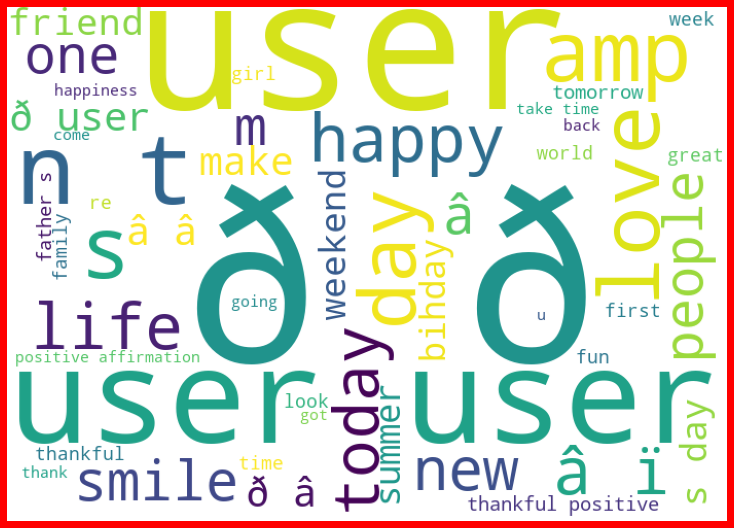

In [17]:
from wordcloud import WordCloud


reviews = df['Final'][df['label']==0]

reviews_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(reviews))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(reviews_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

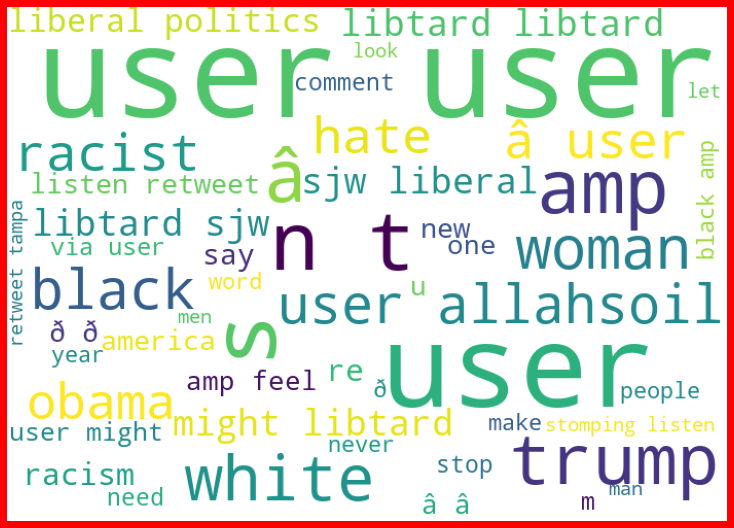

In [18]:
from wordcloud import WordCloud


reviews = df['Final'][df['label']==1]

reviews_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(reviews))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(reviews_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Now we will use TfidVectorizer to convert each word in the dataset into vectors which will be used to build the model as strings are not supported**

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(stop_words='english',
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{2,}',  #vectorize 2-character words or more
    ngram_range=(2, 2))

x = df['Final']
y = df['label']

In [20]:
# Use the content column instead of our single text variable

x = tf.fit_transform(x)
x.shape

(31962, 146808)

In [30]:
print('The shape of x is {}'.format(x.shape))
print('The shape of y is {}'.format(y.shape))

The shape of x is (31962, 146808)
The shape of y is (31962,)


**Importing of train_test_split to divide the dataset into train for training the model and test to evaluate and see how good the trained model is using various evaluation metrics which are imported from sklearn**

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 100)

**Model Building**

In [22]:
#Importing other necessary libraries

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

In [23]:
mnb = MultinomialNB(fit_prior = True)
train = mnb.fit(x_train,y_train)
test = mnb.predict(x_test)

In [24]:
#Confusion Matrix for Naive Byes
print(confusion_matrix(y_test,test))

[[5976    0]
 [ 376   41]]


In [25]:
print('---Accuracy Score for Naive Byes---\n\n',accuracy_score(y_test,test))
print('\n---Classification Report for Naive Byes---\n\n',classification_report(y_test,test))

---Accuracy Score for Naive Byes---

 0.9411856718285625

---Classification Report for Naive Byes---

               precision    recall  f1-score   support

           0       0.94      1.00      0.97      5976
           1       1.00      0.10      0.18       417

    accuracy                           0.94      6393
   macro avg       0.97      0.55      0.57      6393
weighted avg       0.94      0.94      0.92      6393



In [26]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
params = {'alpha': list(np.arange(0.1,3,0.1))}
mnb_grid = GridSearchCV(MultinomialNB(fit_prior = True), param_grid= params, cv = 5, n_jobs=-1)

In [27]:
mnb_grid.fit(x_train,y_train)
print('Best Estimators == > \n', mnb_grid.best_params_)

Best Estimators == > 
 {'alpha': 0.30000000000000004}


In [28]:
mnb_pred =  mnb_grid.predict(x_test)

In [29]:
print(confusion_matrix(y_test,mnb_pred))
print('---Accuracy Score for Naive Byes---\n\n',accuracy_score(y_test,mnb_pred))
print('\n---Classification Report for Naive Byes---\n\n',classification_report(y_test,mnb_pred))

[[5931   45]
 [ 270  147]]
---Accuracy Score for Naive Byes---

 0.9507273580478649

---Classification Report for Naive Byes---

               precision    recall  f1-score   support

           0       0.96      0.99      0.97      5976
           1       0.77      0.35      0.48       417

    accuracy                           0.95      6393
   macro avg       0.86      0.67      0.73      6393
weighted avg       0.94      0.95      0.94      6393



**After building the model and hypertuning it we achieved the accuracy of 95%**

**Saving our built model**

In [30]:
import joblib

filename = "SentimentsPredict.sav"

joblib.dump(mnb_grid,filename)

['SentimentsPredict.sav']